# Find near duplicates

Adjust the parameters below

In [37]:
# Find near duplicates
similarity_threshold = 1 # Higher means more similar images will work. 0 for only exact duplicate
starting_dir = "../data/raw/Furniture_Data/beds" # Change later. Currently testing with just the sub-folder for quicker runtime

# Visualization
groups_to_visualize = 5 # Change how many groups to visualize
starting_group_location = 0 # Change which group to start visualizing

In [38]:
import os
import imagehash
import matplotlib.pyplot as plt
from matplotlib import font_manager
from PIL import Image, ImageDraw, ImageFont

In [39]:
# Fonts for visualization
font = font_manager.FontProperties(family='sans-serif', weight='bold')
file = font_manager.findfont(font)

## Find duplicate function

In [40]:
def find_near_duplicates(root_dir, threshold=5):
    image_hashes = {}
    duplicates = []
    total_folders = sum(len(dirs) for _, dirs, _ in os.walk(root_dir))
    processed_folders = 0

    # Traverse all folders and subfolders within the root directory
    for root, dirs, files in os.walk(root_dir):
        processed_folders += 1
        print(f"Processing folder: {root}")
        print(f"Progress: {processed_folders}/{total_folders} folders processed")

        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(root, file)

                # Calculate perceptual hash of the image
                image = Image.open(file_path)
                image_hash = imagehash.phash(image)

                # Check if a similar hash already exists
                is_duplicate = False
                for existing_hash, paths in image_hashes.items():
                    if image_hash - existing_hash <= threshold:
                        paths.append(file_path)
                        duplicates.append(paths)
                        is_duplicate = True
                        break

                # If the image is not a duplicate, add its hash to the dictionary
                if not is_duplicate:
                    image_hashes[image_hash] = [file_path]

        print(f"Duplicates found so far: {len(duplicates)}")
        print("------------------------------------")

    return duplicates

duplicates = find_near_duplicates(starting_dir, similarity_threshold)

# Print the near-duplicate groups
# for group in duplicates:
#     print("Near-duplicate group:")
#     for file_path in group:
#         print(file_path)
#     print()

Processing folder: ../data/raw/Furniture_Data/beds
Progress: 2/17 folders processed
Duplicates found so far: 0
------------------------------------
Processing folder: ../data/raw/Furniture_Data/beds/Eclectic
Progress: 3/17 folders processed
Duplicates found so far: 0
------------------------------------
Processing folder: ../data/raw/Furniture_Data/beds/Midcentury
Progress: 4/17 folders processed
Duplicates found so far: 0
------------------------------------
Processing folder: ../data/raw/Furniture_Data/beds/Craftsman
Progress: 5/17 folders processed
Duplicates found so far: 2
------------------------------------
Processing folder: ../data/raw/Furniture_Data/beds/Victorian
Progress: 6/17 folders processed
Duplicates found so far: 2
------------------------------------
Processing folder: ../data/raw/Furniture_Data/beds/Transitional
Progress: 7/17 folders processed
Duplicates found so far: 14
------------------------------------
Processing folder: ../data/raw/Furniture_Data/beds/Mediter

## Visualize duplicate function

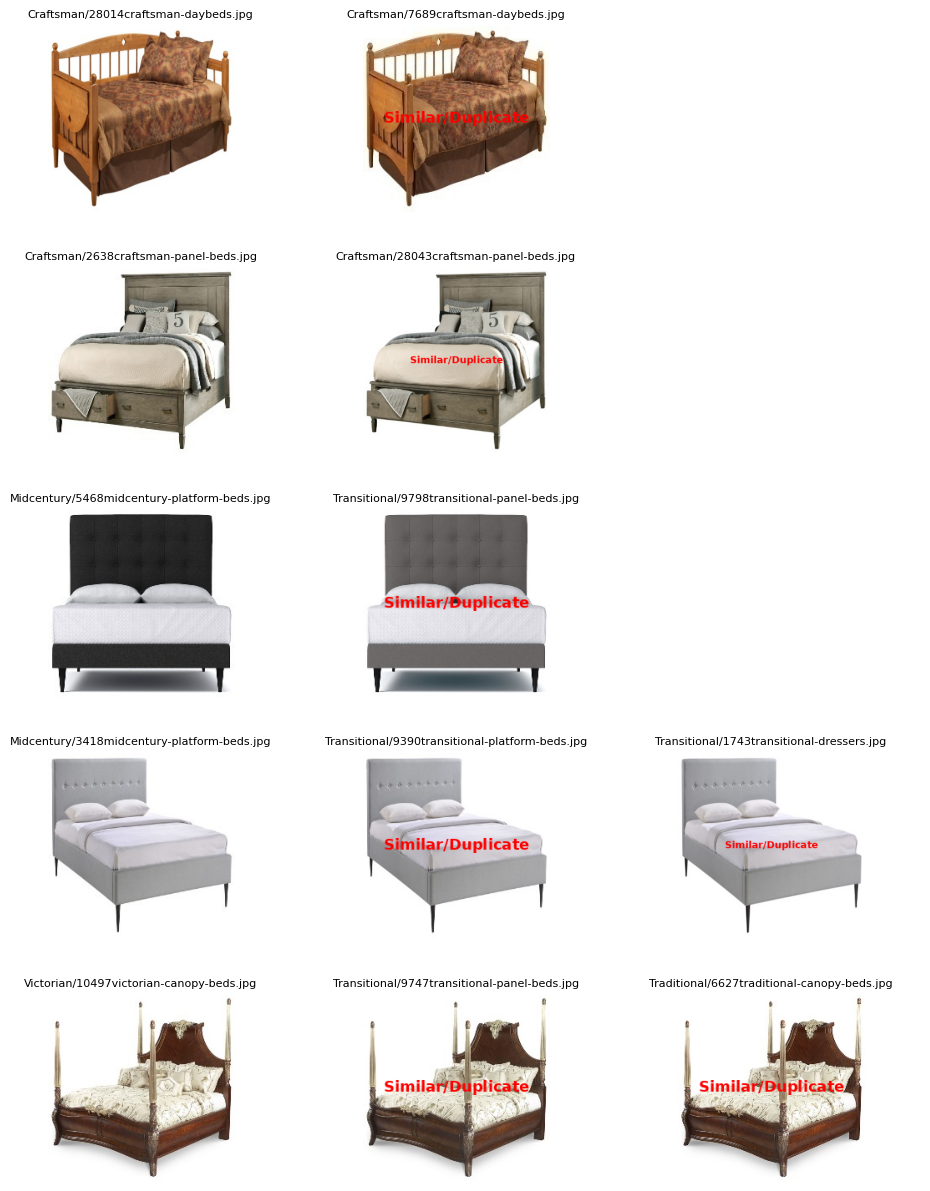

In [41]:
def visualize_duplicates(duplicates, num_groups = 5, start_group=0):
    end_group = min(start_group + num_groups, len(duplicates))
    duplicates_to_visualize = duplicates[start_group:end_group]
    
    num_cols = max(len(group) for group in duplicates_to_visualize)
    fig, axes = plt.subplots(len(duplicates_to_visualize), num_cols, figsize=(4*num_cols, 3*len(duplicates_to_visualize)))
    
    for i, group in enumerate(duplicates_to_visualize):
        for j, file_path in enumerate(group):
            image = Image.open(file_path)
            axes[i, j].imshow(image)
    
            # Display folder and file name instead of group and image number
            folder_name = os.path.basename(os.path.dirname(file_path))
            file_name = os.path.basename(file_path)
            axes[i, j].set_title(f"{folder_name}/{file_name}", fontsize=8)
    
            axes[i, j].axis('off')
            
            if j > 0:
                draw = ImageDraw.Draw(image)
                font = ImageFont.truetype(file, size=18)
                text_bbox = draw.textbbox((0, 0), "Similar/Duplicate", font=font, anchor="lt")
                text_position = ((image.width - text_bbox[2]) // 2, (image.height - text_bbox[3]) // 2)
                draw.text(text_position, "Similar/Duplicate", font=font, fill=(255, 0, 0), anchor="lt")
                axes[i, j].imshow(image)
            
        for j in range(len(group), num_cols):
            axes[i, j].axis('off')
    
    plt.subplots_adjust(wspace=0.05, hspace=0.3)
    plt.show()
    
visualize_duplicates(duplicates, groups_to_visualize, starting_group_location)